Overall solution inspired by these resources:
* https://www.kaggle.com/code/prashant111/logistic-regression-classifier-tutorial/notebook#8.-Declare-feature-vector-and-target-variable-
* Klosterman, S. (2021). Data Science Projects with Python (2nd ed.). Packt Publishing. ISBN: 978-1-80056-448-0 (This one specifically for the data cleaning and exploration steps)
* Decision Tree Classifier Tutorial: https://www.kaggle.com/code/prashant111/decision-tree-classifier-tutorial/notebook

In [1]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')

In [2]:
wine_df = pd.read_csv('winequality-red.csv')

*****************************************************************************************************

# Exploratory Data Analysis

*****************************************************************************************************

In [3]:
wine_df.shape

(1599, 12)

In [4]:
wine_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
wine_df.dtypes.value_counts()

float64    11
int64       1
dtype: int64

In [7]:
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
import matplotlib.pyplot as plt #import plotting package
#render plotting automatically
%matplotlib inline
import matplotlib as mpl #additional plotting functionality
mpl.rcParams['figure.dpi'] = 400 #high resolution figures
import numpy as np

The following function was inspired on the comment made by EdChum, in this publication: 
https://stackoverflow.com/questions/30631841/pandas-how-do-i-assign-values-based-on-multiple-conditions-for-existing-columns

In [9]:
def wine_q(x):
  if x['quality'] >= 7: 
    return 1
  else: 
    return 0

wine_df['quality'] = wine_df.apply(wine_q, axis=1)

In [10]:
wine_df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
my_lr = LogisticRegression()

In [13]:
import matplotlib.pyplot as plt #plotting package
#Next line helps with rendering plots
%matplotlib inline
import matplotlib as mpl #add'l plotting functionality
import seaborn as sns #a fancy plotting package
mpl.rcParams['figure.dpi'] = 400 #high res figures

<AxesSubplot:>

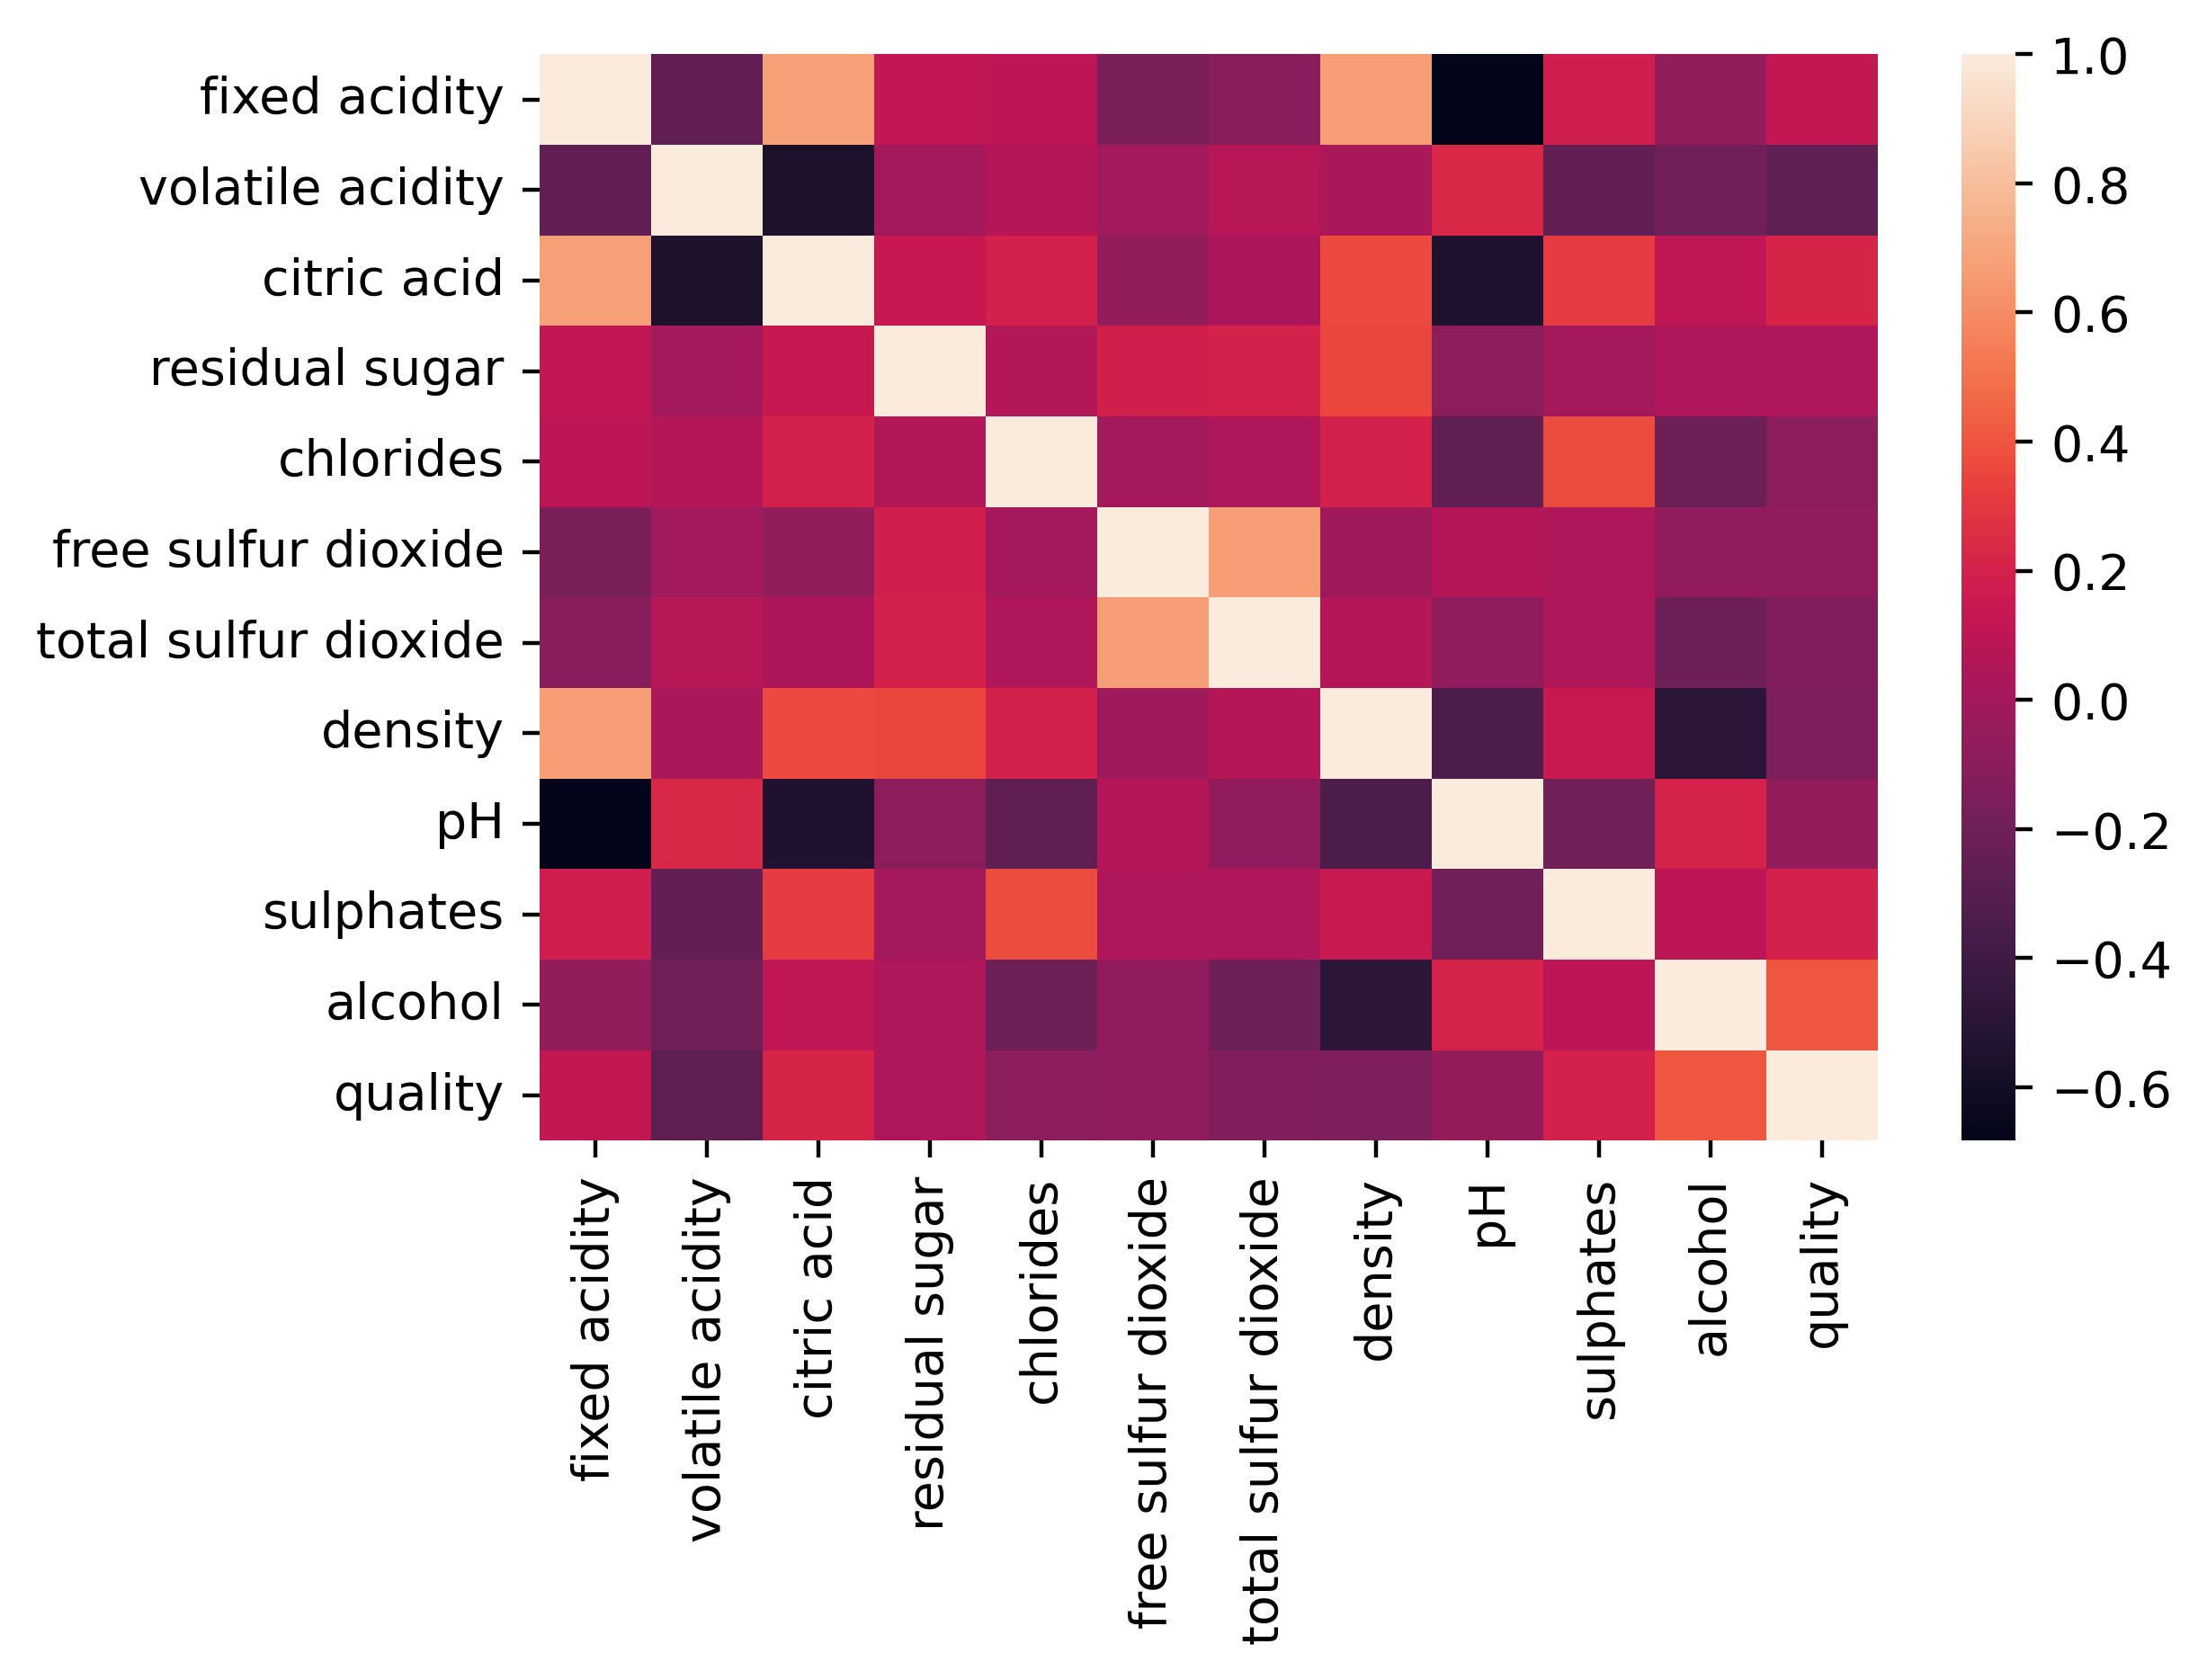

In [14]:
sns.heatmap(wine_df.corr())

In [15]:
wine_df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.120061
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.270712
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.214716
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.047779
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.097308
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.071747
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.139517
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.150460
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057283
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.199485


In [16]:
#Declaring feature vector and target variable

X = wine_df.drop(['quality'], axis=1)

y = wine_df['quality']

In [17]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [18]:
X_train.shape, X_test.shape

((1071, 11), (528, 11))

*****************************************************************************************************

# Decision Tree Classifier

*****************************************************************************************************

In [19]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [20]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [21]:
y_pred_gini = clf_gini.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.8580


In [23]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [24]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.9094


In [25]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.9094
Test set score: 0.8580


[Text(0.5, 0.875, 'X[10] <= 11.55\ngini = 0.227\nsamples = 1071\nvalue = [931, 140]'),
 Text(0.25, 0.625, 'X[1] <= 0.375\ngini = 0.129\nsamples = 908\nvalue = [845, 63]'),
 Text(0.125, 0.375, 'X[7] <= 0.995\ngini = 0.341\nsamples = 156\nvalue = [122, 34]'),
 Text(0.0625, 0.125, 'gini = 0.48\nsamples = 20\nvalue = [8, 12]'),
 Text(0.1875, 0.125, 'gini = 0.271\nsamples = 136\nvalue = [114, 22]'),
 Text(0.375, 0.375, 'X[9] <= 0.665\ngini = 0.074\nsamples = 752\nvalue = [723, 29]'),
 Text(0.3125, 0.125, 'gini = 0.034\nsamples = 528\nvalue = [519, 9]'),
 Text(0.4375, 0.125, 'gini = 0.163\nsamples = 224\nvalue = [204, 20]'),
 Text(0.75, 0.625, 'X[9] <= 0.685\ngini = 0.498\nsamples = 163\nvalue = [86, 77]'),
 Text(0.625, 0.375, 'X[6] <= 14.5\ngini = 0.404\nsamples = 89\nvalue = [64, 25]'),
 Text(0.5625, 0.125, 'gini = 0.469\nsamples = 24\nvalue = [9, 15]'),
 Text(0.6875, 0.125, 'gini = 0.26\nsamples = 65\nvalue = [55, 10]'),
 Text(0.875, 0.375, 'X[5] <= 18.5\ngini = 0.418\nsamples = 74\nvalue

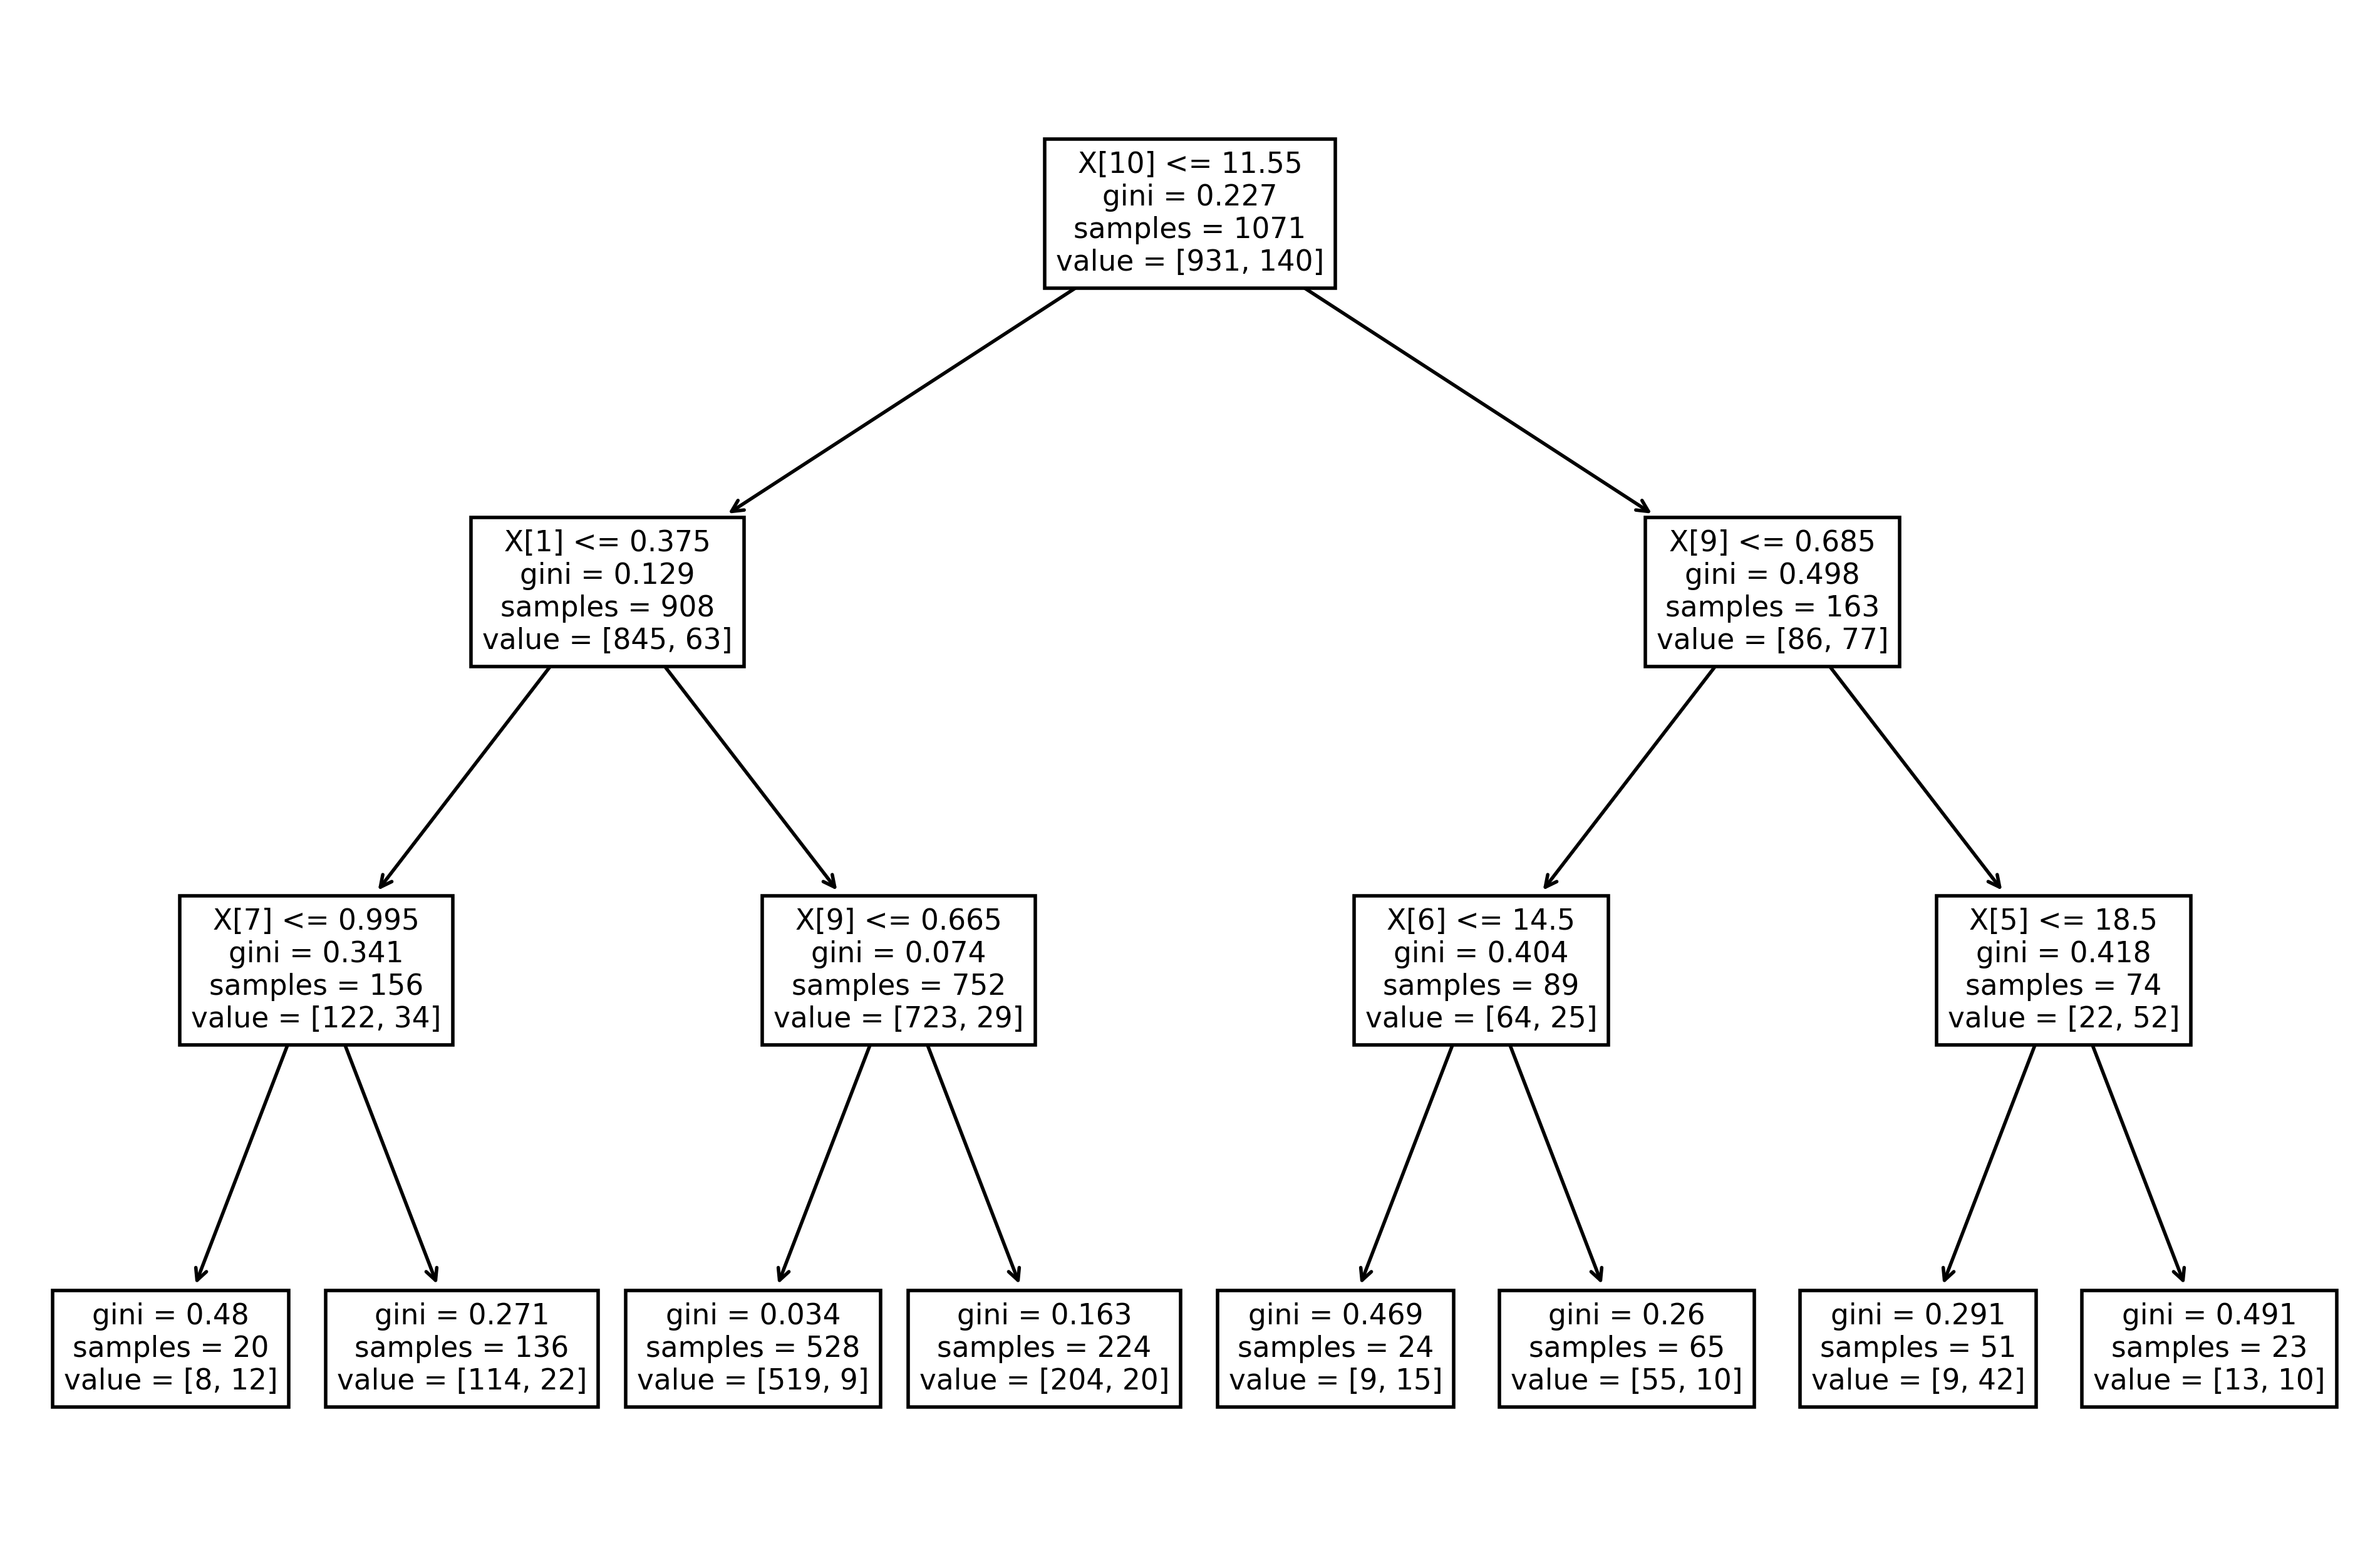

In [26]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

## Logisitic Regression

In [29]:
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [30]:
wine_df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [27]:
X1 = wine_df.drop(['quality'], axis=1)

y1 = wine_df['quality']

In [28]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.33, random_state = 42)

In [31]:
X_train1.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
dtype: object

In [32]:
X_train1.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000
mean,8.303455,0.532465,0.269337,2.546919,0.087727,15.912232,46.763305,0.996779,3.314538,0.658814,10.415219
std,1.707197,0.177055,0.195814,1.407782,0.047312,10.287787,32.994509,0.001843,0.154349,0.173023,1.063407
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.370000,8.400000
25%,7.100000,0.400000,0.090000,1.900000,0.071000,7.000000,22.000000,0.995695,3.220000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.080000,14.000000,38.000000,0.996800,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.430000,2.600000,0.090000,21.000000,63.000000,0.997830,3.400000,0.730000,11.000000
max,15.900000,1.330000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [33]:
cols = X_train1.columns

In [34]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train1 = scaler.fit_transform(X_train1)

X_test1 = scaler.transform(X_test1)

In [36]:
X_train1 = pd.DataFrame(X_train1, columns=[cols])

In [37]:
X_test1 = pd.DataFrame(X_test1, columns=[cols])

In [38]:
X_train1.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000
mean,0.327739,0.340880,0.269337,0.112803,0.126423,0.222571,0.144040,0.492608,0.452392,0.177187,0.310034
std,0.151079,0.146326,0.195814,0.096423,0.078984,0.153549,0.116588,0.135352,0.121535,0.106149,0.163601
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.221239,0.231405,0.090000,0.068493,0.098497,0.089552,0.056537,0.412996,0.377953,0.110429,0.169231
50%,0.292035,0.330579,0.260000,0.089041,0.113523,0.194030,0.113074,0.494126,0.448819,0.153374,0.276923
75%,0.407080,0.429752,0.430000,0.116438,0.130217,0.298507,0.201413,0.569750,0.519685,0.220859,0.400000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [39]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train1, y_train1)

LogisticRegression(random_state=0, solver='liblinear')

### Predicting results

In [44]:
y_pred_test1 = logreg.predict(X_test1)

y_pred_test1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [45]:
#predict_proba method gives the probabilities for the target variable (0 and 1)

logreg.predict_proba(X_test1)[:,0]

array([0.95924763, 0.97062463, 0.95138837, 0.95569809, 0.88105593,
       0.96655756, 0.96932239, 0.96616739, 0.87673621, 0.90747049,
       0.66665418, 0.96371789, 0.93856164, 0.97037999, 0.93741569,
       0.44720033, 0.96613126, 0.91457828, 0.48949578, 0.96299281,
       0.93305073, 0.9686064 , 0.79010045, 0.58197045, 0.95756154,
       0.95483556, 0.67764213, 0.94397031, 0.97680087, 0.75708676,
       0.95765577, 0.88849767, 0.88372231, 0.93555873, 0.96053277,
       0.96995875, 0.69893449, 0.90780421, 0.88737449, 0.62669334,
       0.91244097, 0.95862647, 0.72725574, 0.96588026, 0.84553338,
       0.90463368, 0.64868352, 0.91396927, 0.96008107, 0.92422428,
       0.98344232, 0.95456859, 0.91624097, 0.66031457, 0.97511015,
       0.97160522, 0.80797859, 0.92458377, 0.85438421, 0.96276118,
       0.92962099, 0.80189114, 0.94943267, 0.93933245, 0.57241452,
       0.94060697, 0.51441903, 0.97385753, 0.59331206, 0.96164918,
       0.529897  , 0.98589834, 0.87837716, 0.86056878, 0.69186

### Checking accuracy score

In [46]:
y_pred_train1 = logreg.predict(X_train1)

y_pred_train1

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [48]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test1, y_pred_test1)))

Model accuracy score: 0.8655


In [49]:
#Checking for overfitting and underfitting

# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg.score(X_train1, y_train1)))

print('Test set score: {:.4f}'.format(logreg.score(X_test1, y_test1)))

Training set score: 0.8805
Test set score: 0.8655


In [50]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test1, y_pred_test1)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[443   8]
 [ 63  14]]

True Positives(TP) =  443

True Negatives(TN) =  14

False Positives(FP) =  8

False Negatives(FN) =  63


<AxesSubplot:>

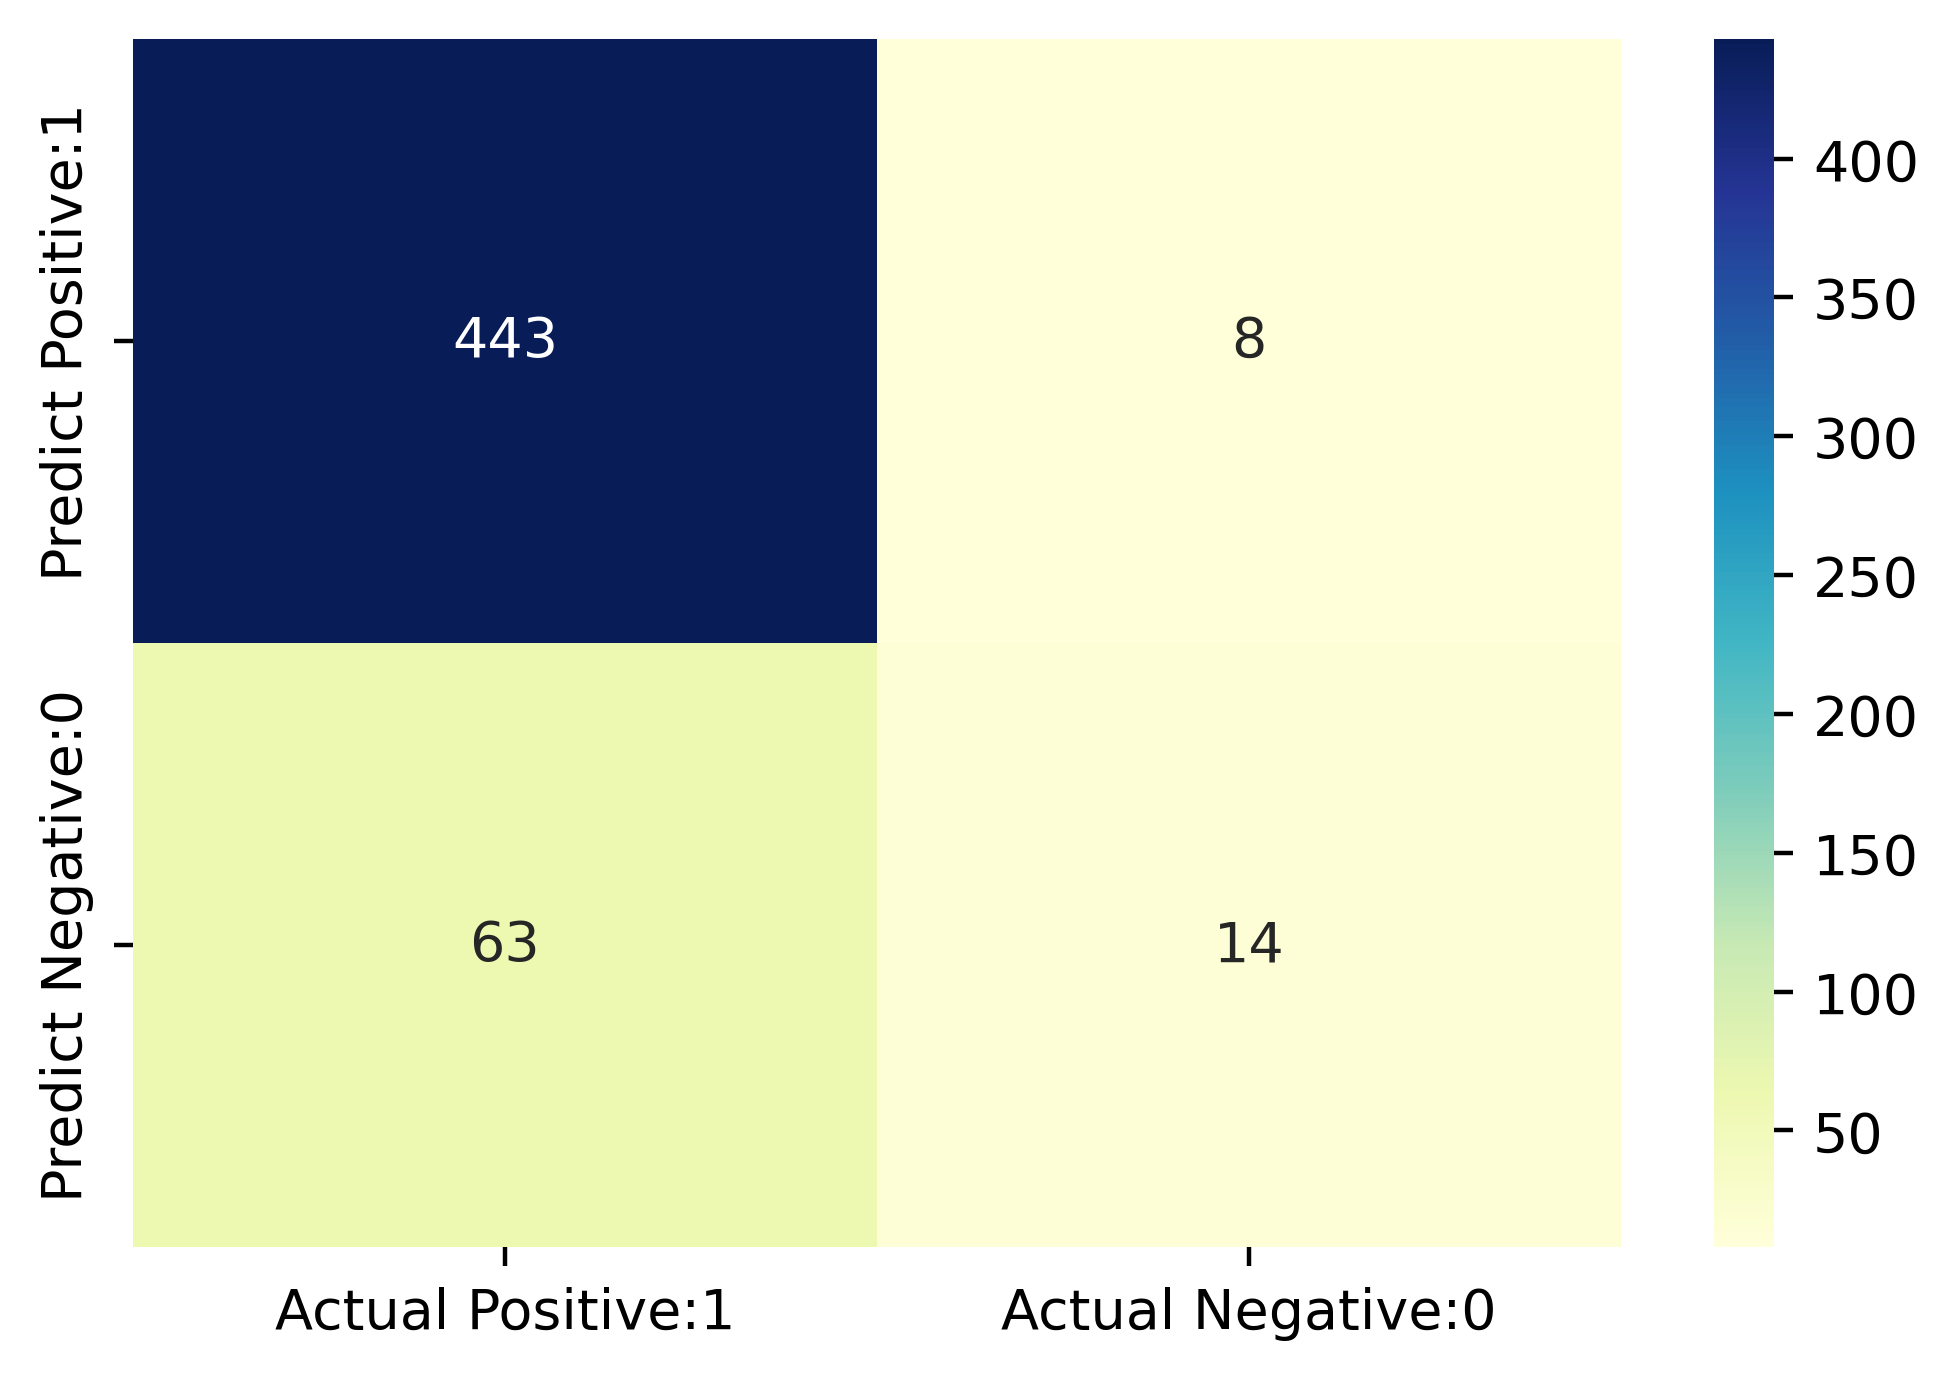

In [51]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [53]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

AUC: 0.582


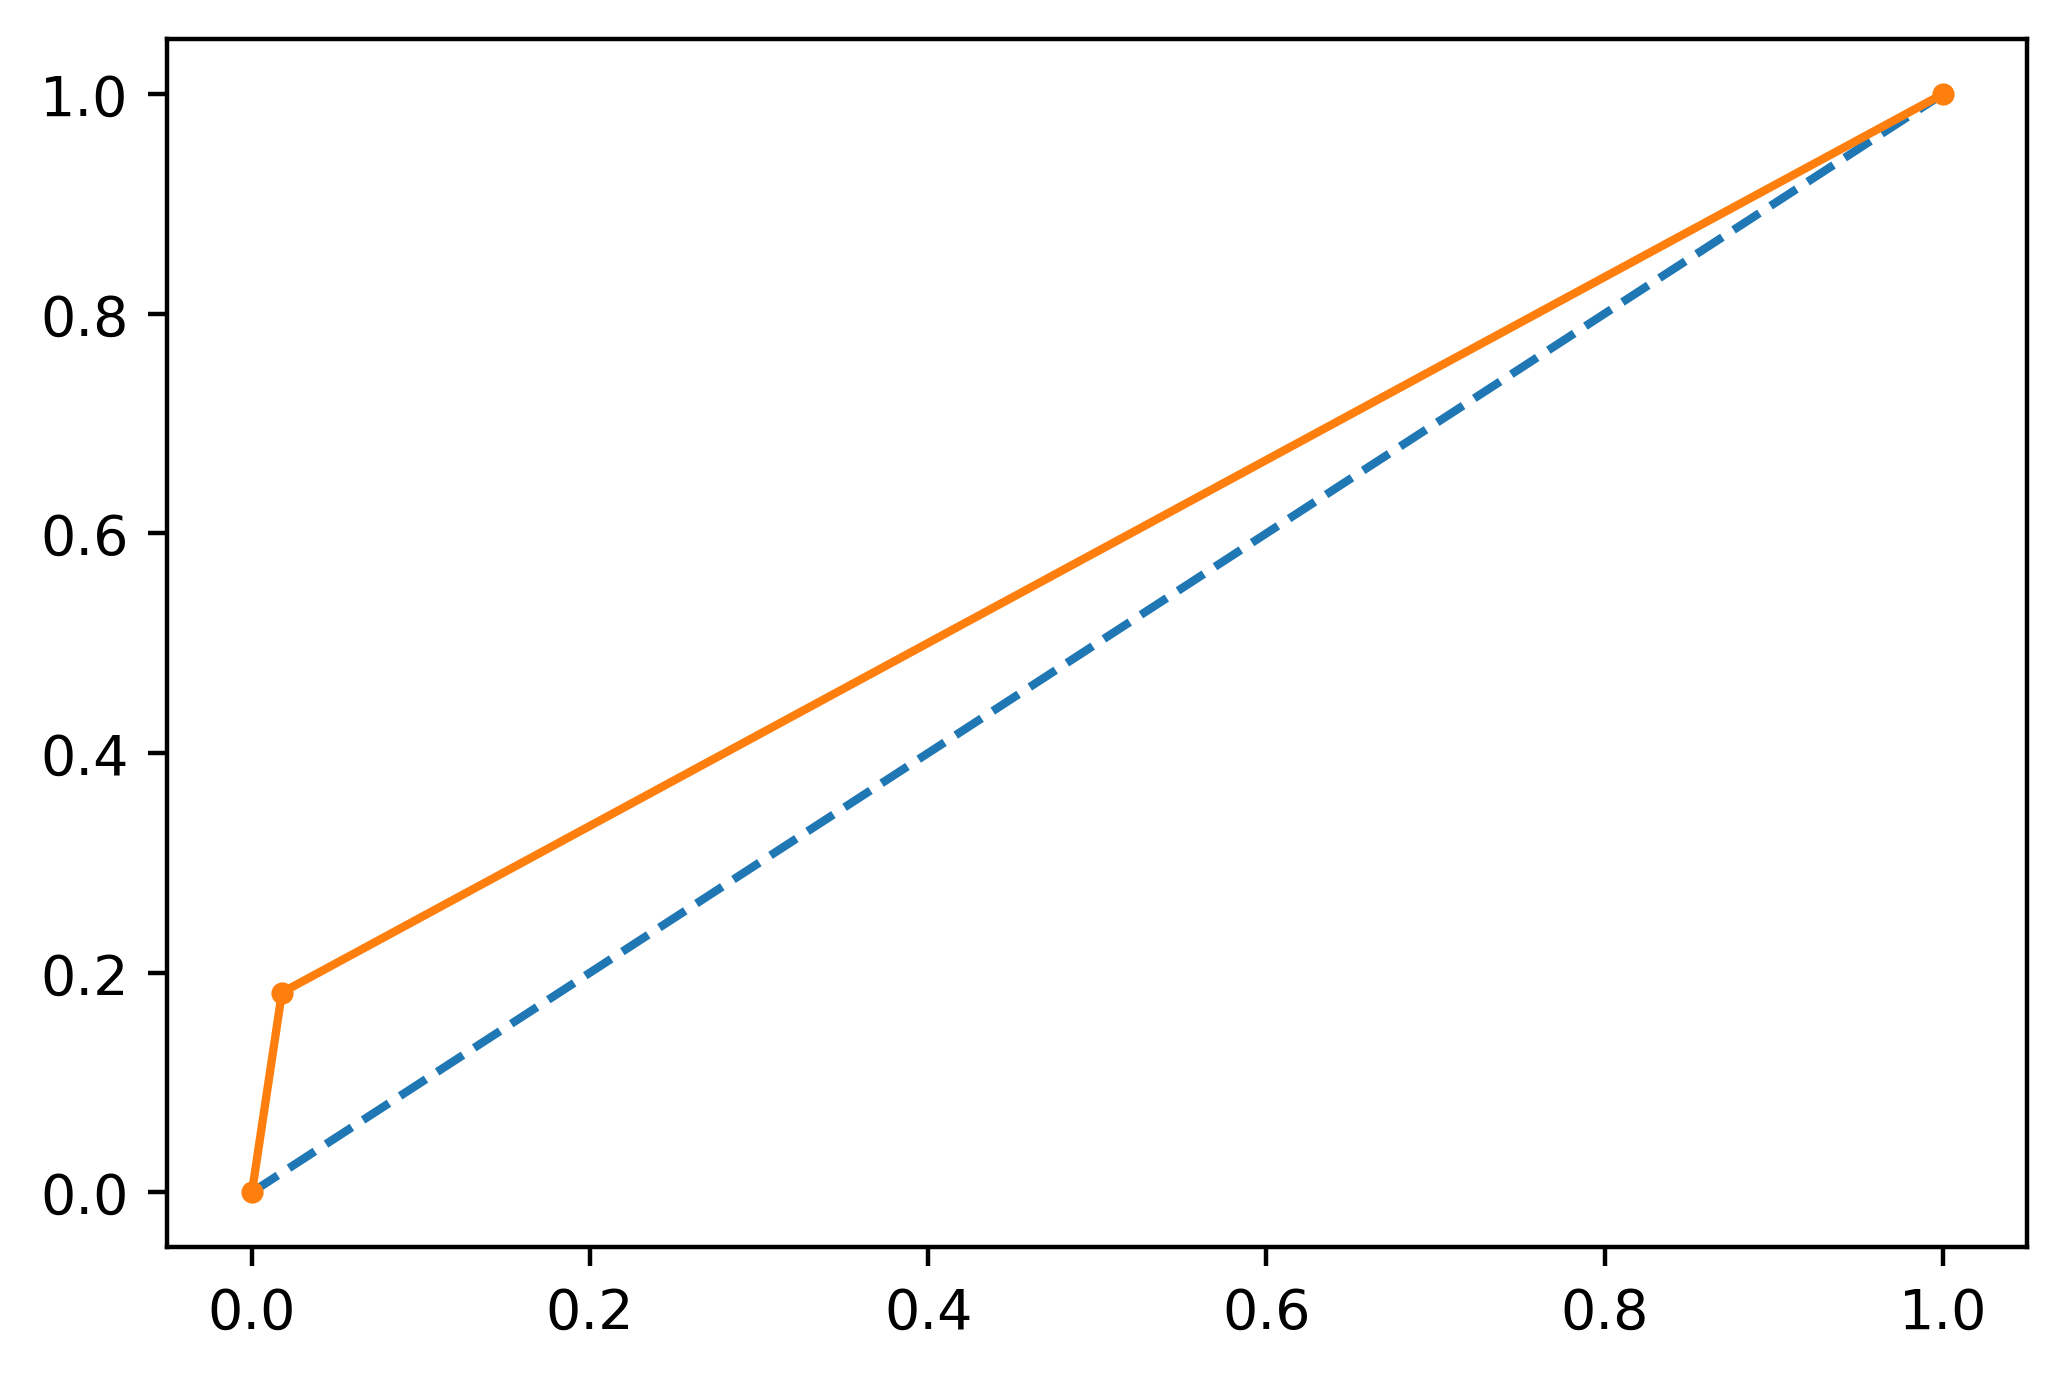

In [54]:
# calculate AUC
auc = roc_auc_score(y_test1, y_pred_test1)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test1, y_pred_test1)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()